In [5]:
#Import necessary library  and functions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [7]:
#importing data
df=pd.read_csv('../data/raw_analyst_ratings.csv')

In [10]:
print(df.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
None


In [12]:
print(df.describe(include='all'))

          Unnamed: 0                 headline  \
count   1.407328e+06                  1407328   
unique           NaN                   845770   
top              NaN  Benzinga's Top Upgrades   
freq             NaN                     5449   
mean    7.072454e+05                      NaN   
std     4.081009e+05                      NaN   
min     0.000000e+00                      NaN   
25%     3.538128e+05                      NaN   
50%     7.072395e+05                      NaN   
75%     1.060710e+06                      NaN   
max     1.413848e+06                      NaN   

                                                      url      publisher  \
count                                             1407328        1407328   
unique                                             883429           1034   
top     https://www.benzinga.com/news/20/03/15538835/s...  Paul Quintaro   
freq                                                 1704         228373   
mean                           

In [9]:
print(df.isnull().sum())
print(df.duplicated().sum())

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64
0


In [13]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour

In [14]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stop words
    return text

df['cleaned_headline'] = df['headline'].apply(clean_text)


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


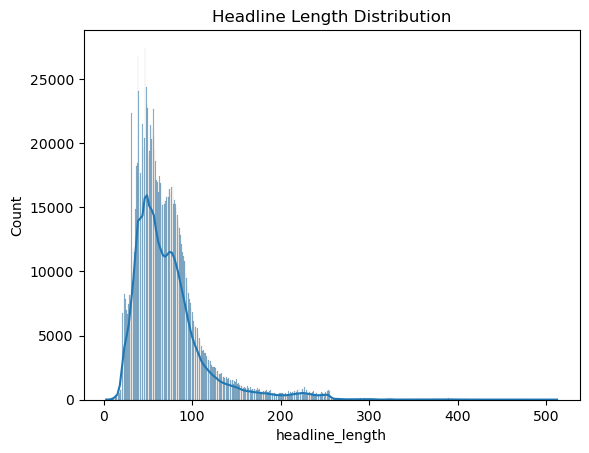

In [15]:
df['headline_length'] = df['headline'].apply(len)
print(df['headline_length'].describe())
sns.histplot(df['headline_length'], kde=True)
plt.title('Headline Length Distribution')
plt.show()

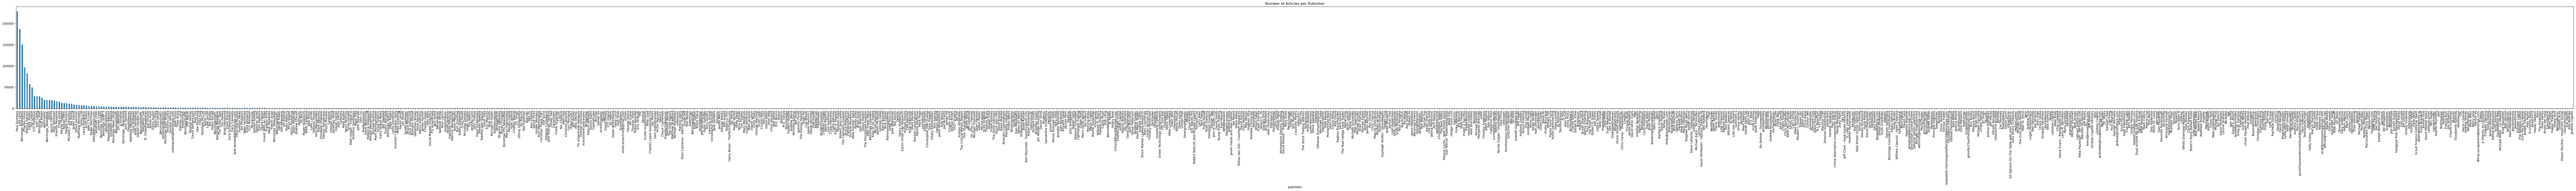

In [16]:
publisher_count = df['publisher'].value_counts()
publisher_count.plot(kind='bar', figsize=(150, 6))
plt.title('Number of Articles per Publisher')
plt.show()

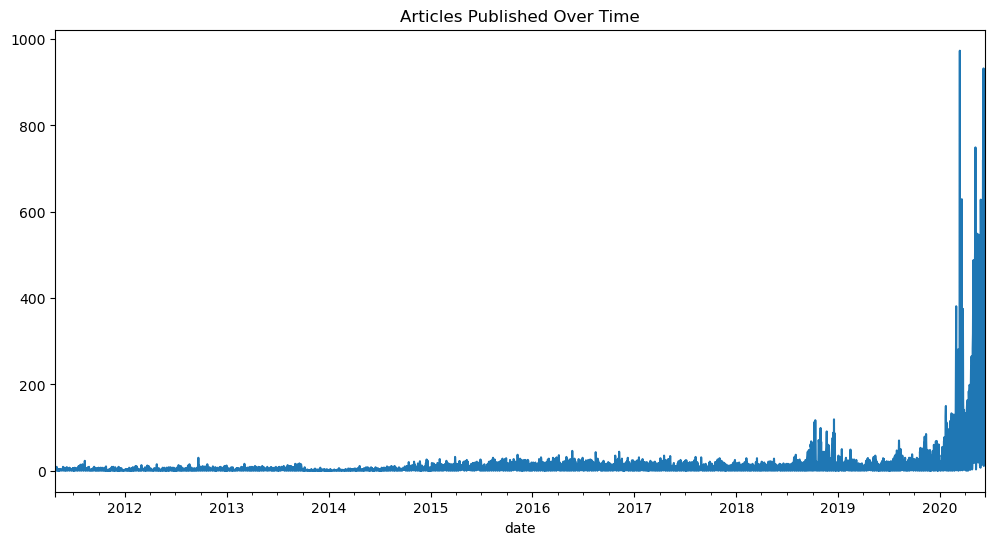

In [17]:
df.set_index('date')['headline'].resample('D').count().plot(figsize=(12, 6))
plt.title('Articles Published Over Time')
plt.show()

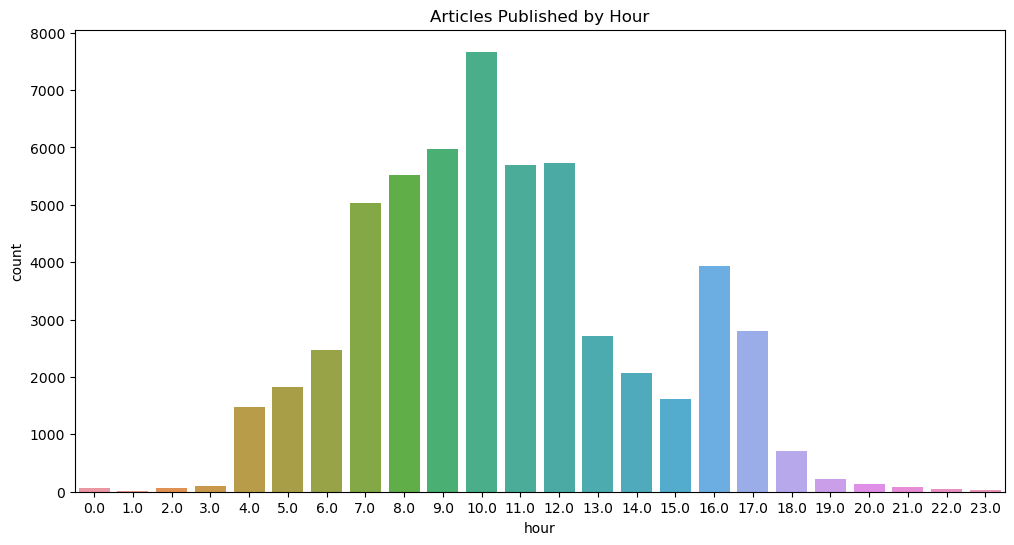

In [18]:
sns.countplot(x='hour', data=df)
plt.gcf().set_size_inches(12, 6)
plt.title('Articles Published by Hour')
plt.show()

In [19]:
df['sentiment'] = df['cleaned_headline'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [20]:
def categorize_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

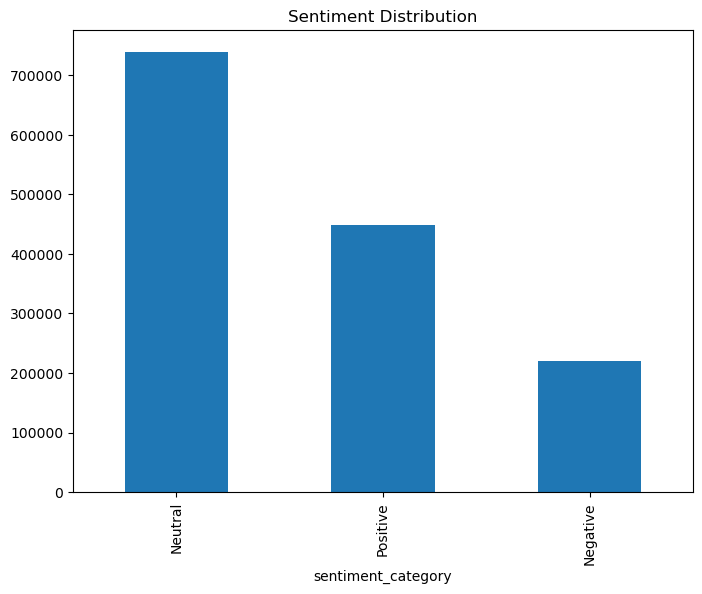

In [21]:
sentiment_counts = df['sentiment_category'].value_counts()
sentiment_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Sentiment Distribution')
plt.show()

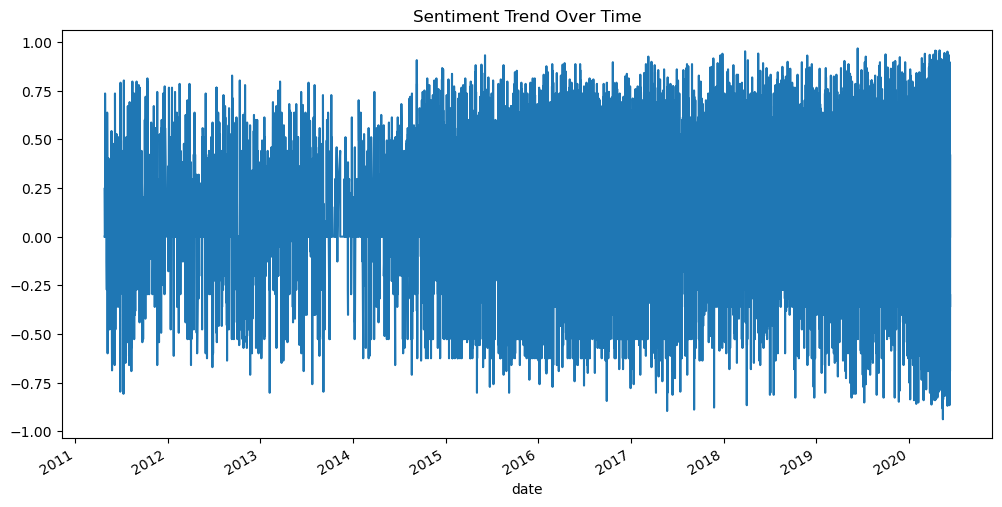

In [22]:
sentiment_trend = df.groupby('date')['sentiment'].mean()
sentiment_trend.plot(figsize=(12, 6))
plt.title('Sentiment Trend Over Time')
plt.show()

In [24]:
df.to_csv('../data/cleaned_analyst_ratings.csv', index=False)